In [12]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

#### The Hamiltonian of TFIM

$
H = -J \sum_{\langle i, j \rangle} \sigma_i^z \sigma_j^z - h \sum_{i} \sigma_i^x 
$

where:
- $ \sigma_i^z $ and $ \sigma_j^z $ are the Pauli-z matrices at sites $ i $ and $ j $.
- $ \sigma_i^x $ is the Pauli-x matrix at site $i $.
- $ J $ is the interaction strength between neighboring spins.
- $ h $ is the strength of the transverse magnetic field.
- The summation $ \langle i, j \rangle $ runs over all pairs of neighboring spins.

In matrix form for a single spin, the Pauli matrices are:

$ 
\sigma^z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}, \quad 
\sigma^x = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} 
$

In [46]:
def pauli_matrices():
    pz = np.array([[1, 0],
                   [0, -1]])

    px = np.array([[0, 1],
                   [1, 0]])

    id = np.array([[1, 0],
                   [0, 1]])
    return px, pz, id

def apply_pauli(matrix, pos, n):
    id = np.eye(2)

    result = 1
    for i in range(n):
        if i == pos:
            result = np.kron(result, matrix)
        else:
            result = np.kron(result, id)
    return result

def hamiltonian(n_sites, h, j, periodic=False):
    px, pz, id = pauli_matrices()
    
    H_coupling = np.zeros((2**n_sites, 2**n_sites))
    H_quantum = np.zeros((2**n_sites, 2**n_sites))
    
    for i in range(n_sites - 1):
        H_coupling -= j * np.dot(apply_pauli(pz, i, n_sites), apply_pauli(pz, i + 1, n_sites))
    
    if periodic:
        H_coupling -= j * np.dot(apply_pauli(pz, n_sites - 1, n_sites), apply_pauli(pz, 0, n_sites))
    
    for i in range(n_sites):
        H_quantum -= h * apply_pauli(px, i, n_sites)
    
    H = H_coupling + H_quantum
    return H

def calculate_basis(n_sites):
    basis = []
    for i in range(2**n_sites):
        basis.append([int(x) for x in np.binary_repr(i, width=n_sites)])
    return basis

def calculate_magnetization(state):
    n_sites = np.log2(len(state))
    n_sites = int(n_sites)
    basis = calculate_basis(n_sites)
    M = 0.
    for i, bstate in enumerate(basis):
        bstate_M = 0.
        for spin in bstate:
            bstate_M += (state[i]**2 * (1 if spin else -1)) / len(bstate)
        M += abs(bstate_M)
    return M

def ground_state_properties(n_sites, h, j, periodic=False):
    # Construct the Hamiltonian
    H = hamiltonian(n_sites, h, j, periodic)
    
    # Perform exact diagonalization
    eigenvalues, eigenvectors = eigh(H)
    
    # Ground state energy (smallest eigenvalue)
    ground_state_energy = eigenvalues[0]
    
    # Ground state vector (eigenvector corresponding to the smallest eigenvalue)
    ground_state = eigenvectors[:, 0]
    
    # Calculate basis states
    
    # Calculate magnetization
    ground_state_magnetization = calculate_magnetization(ground_state)
    
    return ground_state_energy, ground_state_magnetization


In [47]:
H = hamiltonian(5, 1, 1)

eigenvalues, eigenvectors = eigh(H)

In [48]:
np.log2(len(eigenvectors[0]))

5.0

In [49]:
print(eigenvectors[0])

[-4.36969619e-01  5.72308490e-01  0.00000000e+00  4.75491078e-01
 -1.89187149e-01 -2.51225234e-16  0.00000000e+00 -5.38482769e-02
 -1.55412734e-01  9.34215177e-02  7.70688071e-17 -3.28221283e-01
 -1.31740280e-16 -9.10951160e-03  7.93857071e-17  1.26647840e-01
 -7.05262443e-02 -8.66275580e-17 -9.85870422e-02 -6.90559325e-17
 -4.72124908e-02 -6.91180062e-17  8.09869056e-02  7.56845576e-03
  1.71038920e-01 -3.64596055e-17 -4.93340425e-17 -4.81346600e-02
  3.60477338e-02  0.00000000e+00 -1.27339803e-02  5.85953214e-02]


#### Site numbers & Magnetic field

In [50]:
site_numbers = [3, 5, 7, 9]
h_values = np.logspace(-2, 2, 20)

# Parameters for TFIM
j = 1.0
periodic = False

magnetizations = {n_sites: [] for n_sites in site_numbers}
energies = {n_sites: [] for n_sites in site_numbers}
for n_sites in site_numbers:
    for h in h_values:
        energy, magnetization = ground_state_properties(n_sites, h, j, periodic)
        energies[n_sites].append(energy)
        magnetizations[n_sites].append(magnetization)
        print(f"n_site: {n_sites}, h_value: {h}, energy: {energy}, magnetization: {magnetization}")

n_site: 3, h_value: 0.01, energy: -2.0001260009924318, magnetization: 0.9999619162456799
n_site: 3, h_value: 0.016237767391887217, energy: -2.0003338691454187, magnetization: 0.9998986257801864
n_site: 3, h_value: 0.026366508987303583, energy: -2.00088736047737, magnetization: 0.9997286003258778
n_site: 3, h_value: 0.04281332398719394, energy: -2.002369917429248, magnetization: 0.9992668609271855
n_site: 3, h_value: 0.06951927961775606, energy: -2.0063779281010334, magnetization: 0.9979926109071949
n_site: 3, h_value: 0.11288378916846889, energy: -2.0173636592099804, magnetization: 0.9944000183021183
n_site: 3, h_value: 0.18329807108324356, energy: -2.0480263292847907, magnetization: 0.9840672677867034
n_site: 3, h_value: 0.29763514416313175, energy: -2.1348868524974463, magnetization: 0.9547872925385754
n_site: 3, h_value: 0.4832930238571752, energy: -2.375923329179449, magnetization: 0.8834447567022224
n_site: 3, h_value: 0.7847599703514611, energy: -2.974093546074012, magnetization:

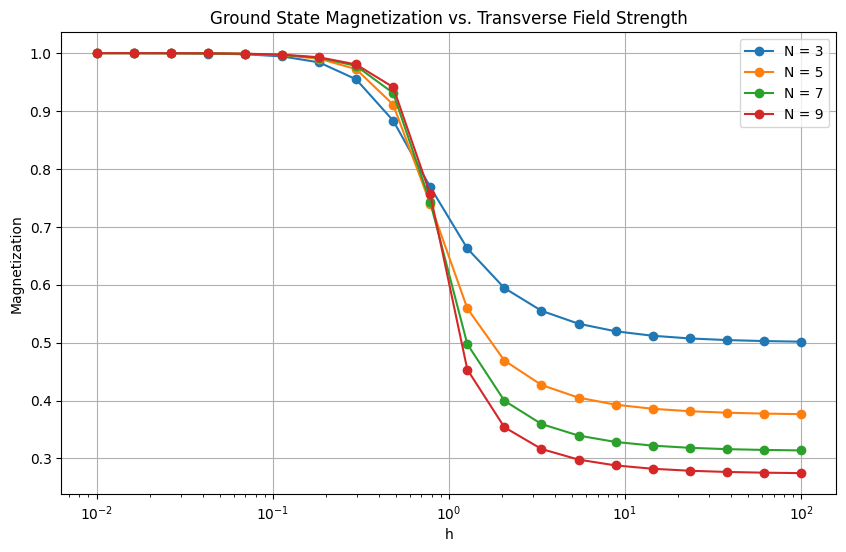

In [51]:
plt.figure(figsize=(10, 6))
for n_sites in site_numbers:
    plt.plot(h_values, magnetizations[n_sites], 'o-', label=f'N = {n_sites}')
plt.xscale('log')
plt.xlabel('h')
plt.ylabel('Magnetization')
plt.title('Ground State Magnetization vs. Transverse Field Strength')
plt.legend()
plt.grid(True)
plt.show()

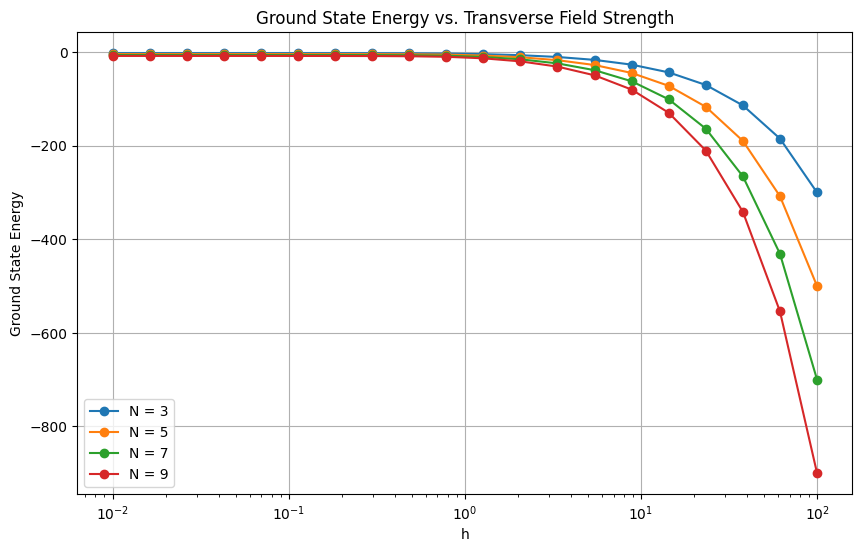

In [52]:
plt.figure(figsize=(10, 6))
for n_sites in site_numbers:
    plt.plot(h_values, energies[n_sites], 'o-', label=f'N = {n_sites}')
plt.xscale('log')
plt.xlabel('h')
plt.ylabel('Ground State Energy')
plt.title('Ground State Energy vs. Transverse Field Strength')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Range of site numbers
site_numbers = np.arange(2, 21, 1)  # 2, 4, 6, ..., 20

# Arrays to store results
hamiltonian_sizes = []
estimated_time_complexities = []

# Calculate Hamiltonian size and estimated time complexity for each site number
for n_sites in site_numbers:
    size = 2**n_sites
    hamiltonian_sizes.append(size)
    
    # Estimating the time complexity using O(2^(3N))
    estimated_time_complexity = size**3  # Since size = 2^N, size^3 = (2^N)^3 = 2^(3N)
    estimated_time_complexities.append(estimated_time_complexity)

# Convert to arrays for easier plotting
hamiltonian_sizes = np.array(hamiltonian_sizes)
estimated_time_complexities = np.array(estimated_time_complexities)

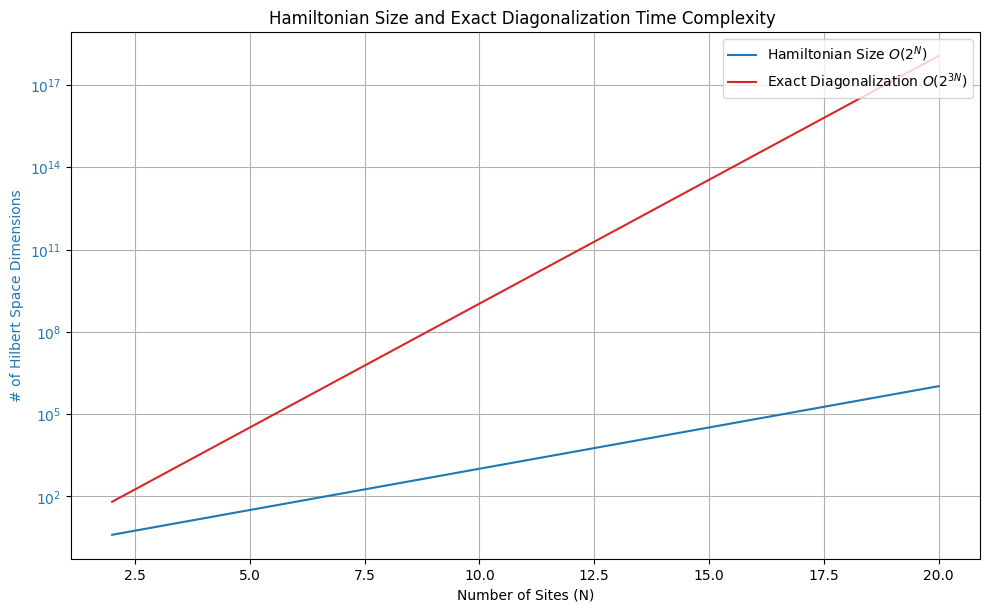

In [8]:
# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Hamiltonian size
color = 'tab:blue'
ax1.set_xlabel('Number of Sites (N)')
ax1.set_ylabel('# of Hilbert Space Dimensions', color=color)
ax1.plot(site_numbers, hamiltonian_sizes, label=r'Hamiltonian Size $O(2^{N})$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.legend(loc='upper left')

# Plot estimated time complexity on the same y-axis
color = 'tab:red'
ax1.plot(site_numbers, estimated_time_complexities, label=r'Exact Diagonalization $O(2^{3N})$', color=color)
ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Hamiltonian Size and Exact Diagonalization Time Complexity ')
ax1.grid(True)
plt.show()